<a href="https://colab.research.google.com/github/Dikiwp30/Studi-Independen/blob/main/Diki_Wahyu_P_EDA_and_prediction_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

Import the appropriate libraries that are needed in this notebook in order to perform the analysis.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#  Load the  data

In [ ]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


# Data Examination and Variable Description

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
full_data = [train, test]



 ### Categorical Features :
 
####  Nominal
*      Sex (female=0 male=1)
*      Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
*      Survived: passenger survive(1) or died(0)

#### Ordinal  :
 
*      Pclass: Ticket class

#### Discrete : 
*       SibSp: number of siblings/spouses
*       Parch: number of parents/childrena

### Quantitative Features

####  Continuous:
*      Age 
*      Fare: Passenger fare


### Mixed Data Types

### Alphanumerical 
* Cabin
* Ticket




#  Univariate Analysis on Continuous Features

## Age and Fare Distribution

In [ ]:
def plot_hist(variable,dataset):
    plt.figure(figsize = (14,7))
    plt.hist(dataset[variable], bins = 75, color = '#3F5D7D', alpha = 0.7)
    plt.xlabel(variable,fontsize=15)
    plt.ylabel("Number of Passengers",fontsize=15)
    plt.title("{} distribution".format(variable),fontsize=20)
    plt.tight_layout()

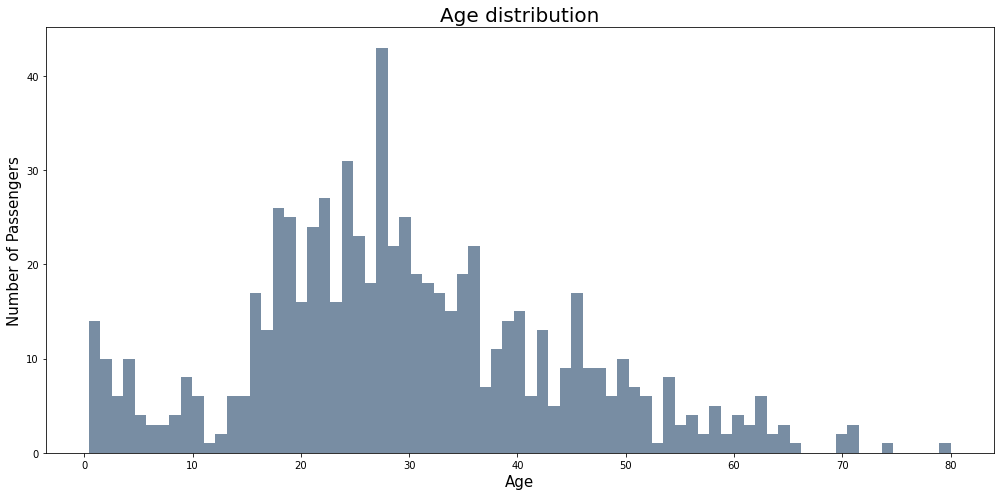

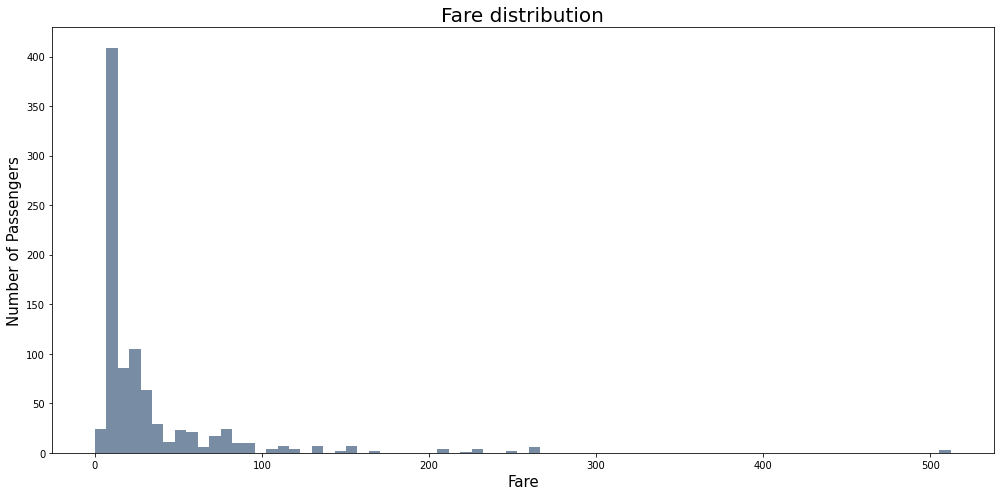

In [ ]:
numericVar=['Age','Fare']
for n in numericVar:
    plot_hist(n,train)

# Bivariate  Analysis

#### Some observations:
* pclass fare
* sibsp fare
* parc fare
* age sibsp parch
* age and fare
* higher survival rate on pclass 1 and 2 than 3
* higher fare = higher survival rate

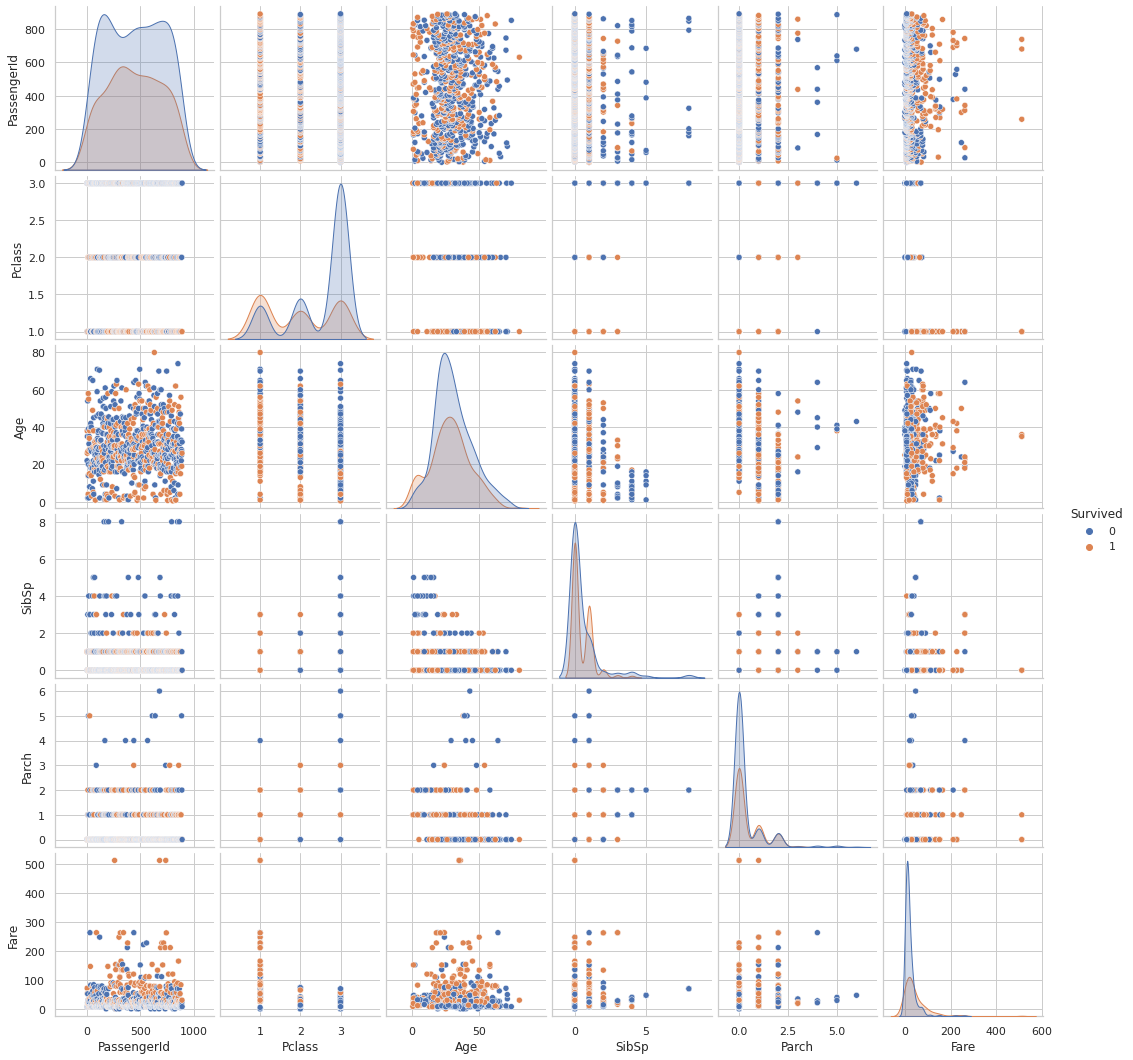

In [ ]:
 sns.set(style='whitegrid', context='notebook',rc={'figure.figsize':(10,10)})
 sns.pairplot(train, hue='Survived')

In [ ]:
print(train[train['Age'] > 65].Survived.value_counts(normalize=True))
print(train[train['Age'] < 10].Survived.value_counts(normalize=True).round(3))
print(train[train['Fare'] > train['Fare'].mean()].Survived.value_counts(normalize=True))

0    0.875
1    0.125
Name: Survived, dtype: float64
1    0.613
0    0.387
Name: Survived, dtype: float64
1    0.597156
0    0.402844
Name: Survived, dtype: float64


#### Male survival rates are significantly lower than female survival rates, as shown in Figure below. We can assume that 'Sex' is a significant factor in predicting Survival status. 'Pclass' is another significant property for the prediction as  the  passengers in the third class appear to have died in greater numbers than passengers in the other classes.
#### It is also seen that the highest percentage of survivors are in the 1st class. Additionaly, number of survivors in class 1 is higher than the number of passengers who lost their lives in the same class. We could make a similar assumption for 'Embarked' collumn.
####  Furthermore, the number of passengers who survived in Pclass 1 is higher than the number of people who died in the same class as well as is the number of the passengers who embarked from Southampton.

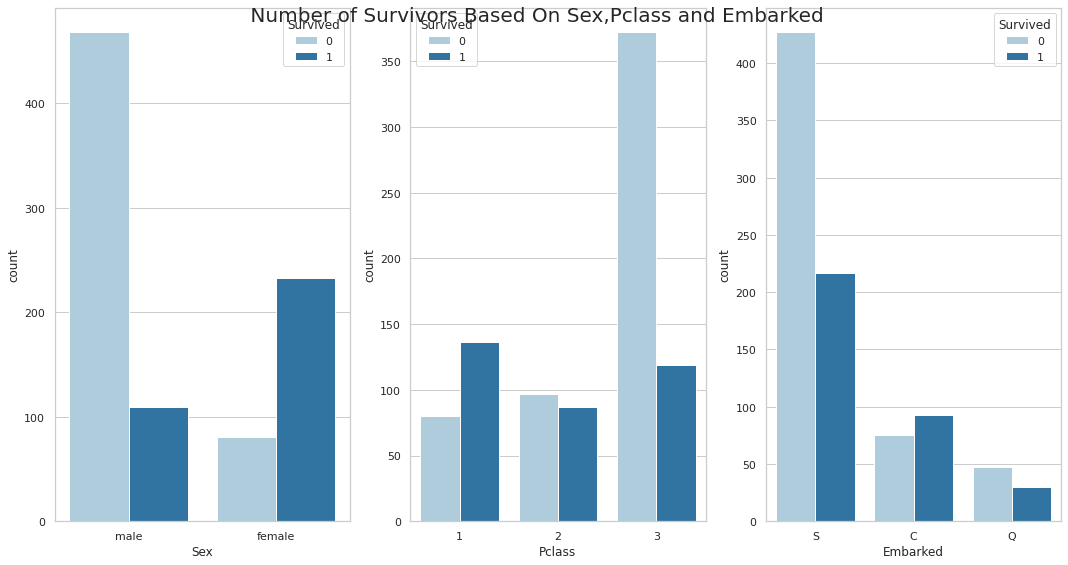

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,8))

plt.suptitle(" Number of Survivors Based On Sex,Pclass and Embarked",fontsize=20)
sns.countplot(x="Sex",hue="Survived",data=train,ax=axes[0],palette="Paired")
sns.countplot(x="Pclass",hue="Survived",data=train,ax=axes[1],palette="Paired")
sns.countplot(x="Embarked",hue="Survived",data=train,ax=axes[2],palette="Paired")
plt.tight_layout()


#  Identyfing missing values

In [ ]:
missing= train.isnull().sum()
pct_missing=(missing/len(train)*100).round(2)
pd.concat([missing,pct_missing],keys=["Number of NaN train","%pct"],axis=1).sort_values(by="%pct",ascending=False)

,Number of NaN train,%pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [ ]:
missing= test.isnull().sum()
pct_missing=(missing/len(test)*100).round(2)
pd.concat([missing,pct_missing],keys=["Number of NaN Data","%pct"],axis=1).sort_values(by="%pct",ascending=False)

,Number of NaN Data,%pct
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


### It can be seen that the columns 'Age' and 'Cabin' rank top and second in terms of missing data. In the Cabin, Age, and Embarked columns of the train data set , 77.10 percent, 19.87 percent, and 0.22 percent of the values are missing, respectively. Because of the large rate of missing data, removing the 'Cabin' column from the dataframe seems reasonable. 
### However, one out of every five ages is missing in the Age column, and we will attempt  to fill those gaps. In addition, there are just two integers missing in the Embarked column, so we'll choose the most frequent value  to fill in the NaN values.


# Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

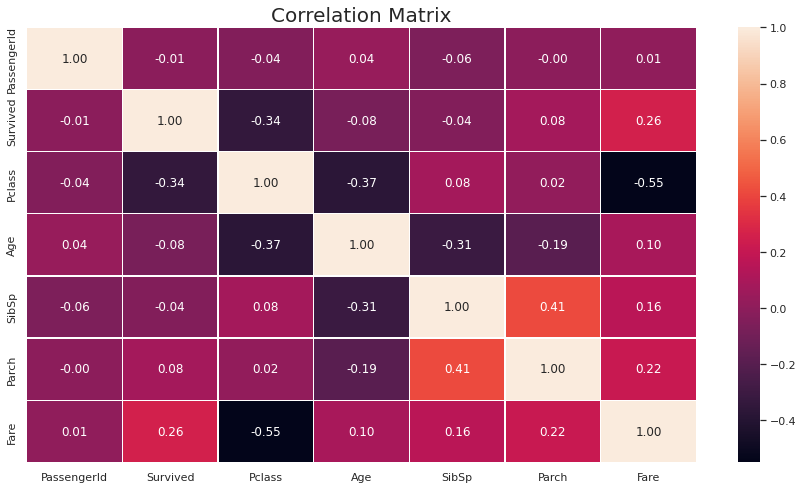

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(train.corr(),annot=True,fmt=",.2f",ax=ax,linewidths=.2)
ax.set_title("Correlation Matrix",fontsize=20)

#  Feature Engineering and Data Preprocessing


In [ ]:
for dataset in full_data:
    dataset.Embarked.fillna(train.Embarked.value_counts().idxmax(),inplace=True)
    dataset["FamilySize"]=train["SibSp"]+train["Parch"] + 1

test.Fare.fillna(train.Fare.value_counts().idxmax(),inplace=True)    

In [ ]:
pd.crosstab(train.Survived,train.FamilySize,margins=True).style.set_caption("Survived vs FamilySize").background_gradient(cmap='coolwarm')

FamilySize,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


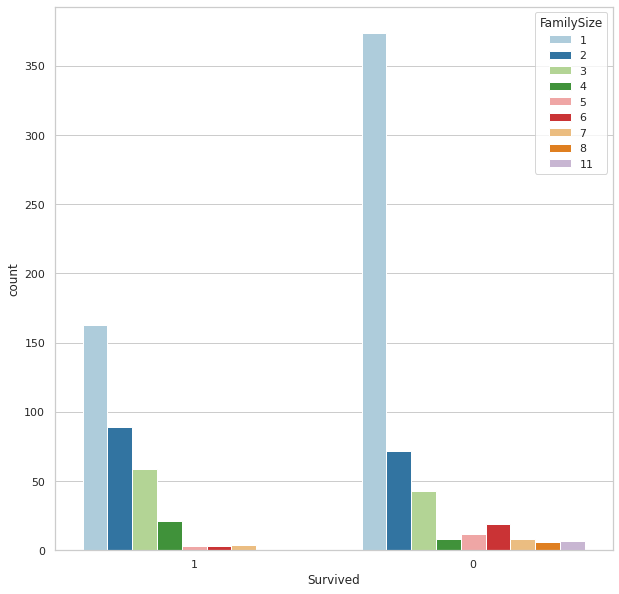

In [ ]:
sns.countplot(x="Survived",hue="FamilySize",data=train,palette="Paired",order=[1,0])
sns.set(rc={'figure.figsize':(12,6)})

###  Family Group 

In [ ]:
train.FamilySize.value_counts()


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [ ]:
for dataset in full_data:
    dataset["Family_Group"]=0
    dataset.loc[dataset["FamilySize"]<=3,"Family_Group"]=2 #SMALL FAMILY
    dataset.loc[dataset["FamilySize"]==1,"Family_Group"]=1  #IS ALONE
    dataset.loc[dataset["FamilySize"]>3,"Family_Group"]=3 #BIG FAMILYfor i in train.Family_Group.unique():

for i in train.Family_Group.unique():
    print(i,round(train[train.Family_Group==i].Survived.mean(),2))
    


2 0.56
1 0.3
3 0.34


### Creating a Title collumn by extracting the pronouns from the name collumn

In [ ]:
#extract the title from the name
for dataset in full_data:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    print(dataset.Title.value_counts())

    

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [ ]:
for dataset in full_data:
    dataset.Title.replace(["Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Lady","Countess","Mlle","Ms","Mme","Dona"],"Rare",inplace=True)
    
train.Title.value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

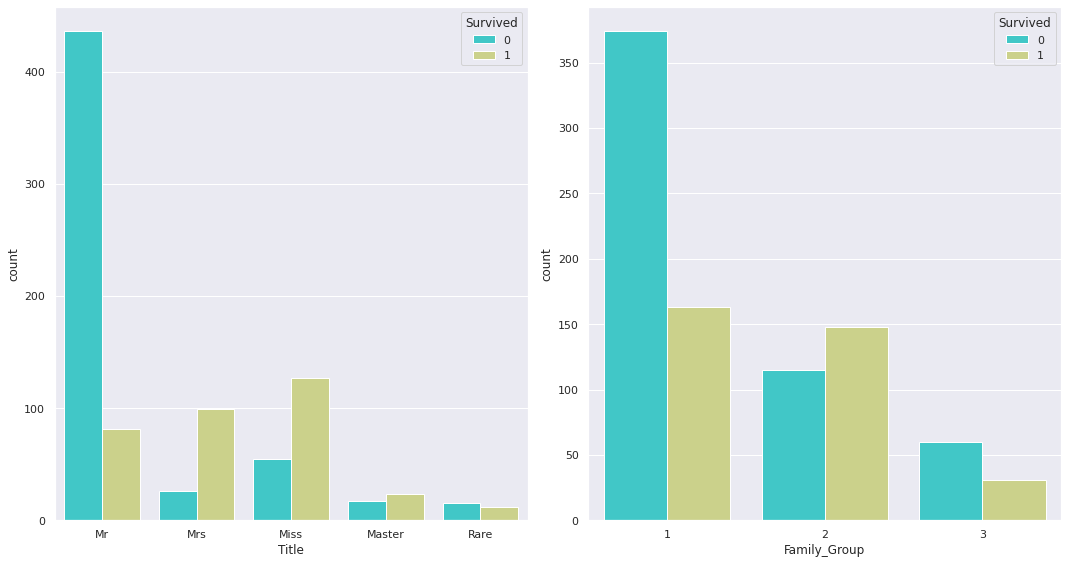

In [ ]:
f,axes=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x="Title",hue="Survived",data=train,ax=f.axes[0],palette="rainbow")
sns.countplot(x="Family_Group",hue="Survived",data=train,ax=f.axes[1],palette="rainbow")
plt.tight_layout()


#### Mapping

In [ ]:
for dataset in full_data:
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    embarked_mapping = {"S": 1, "C": 2, "Q": 3}
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    dataset['Sex'].replace(['female','male'],[0,1],inplace=True)


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,1,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,3,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1,5,3,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,1,3,2,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,2,2,2,3


#  Identify Outliers

### Interquartile Range(IQR)
The interquartile range (IQR) is the difference between the 75th and 25th percentile of a dataset. The IQR is a measure of spread, and is used to determine outliers.

In [ ]:
#print the skewvalue of each numerical variable
for dataset in full_data:
    skewness = dataset.skew()
    print(skewness)
    skewness.sort_values(ascending=False)

PassengerId     0.000000
Survived        0.478523
Pclass         -0.630548
Sex            -0.618921
Age             0.389108
SibSp           3.695352
Parch           2.749117
Fare            4.787317
Embarked        1.543397
FamilySize      2.727441
Family_Group    1.004472
Title           1.391300
dtype: float64
PassengerId     0.000000
Pclass         -0.534170
Sex            -0.568991
Age             0.457361
SibSp           4.168337
Parch           4.654462
Fare            3.691642
Embarked        1.162115
FamilySize      2.672520
Family_Group    0.912990
Title           1.189489
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Fare Distribution')

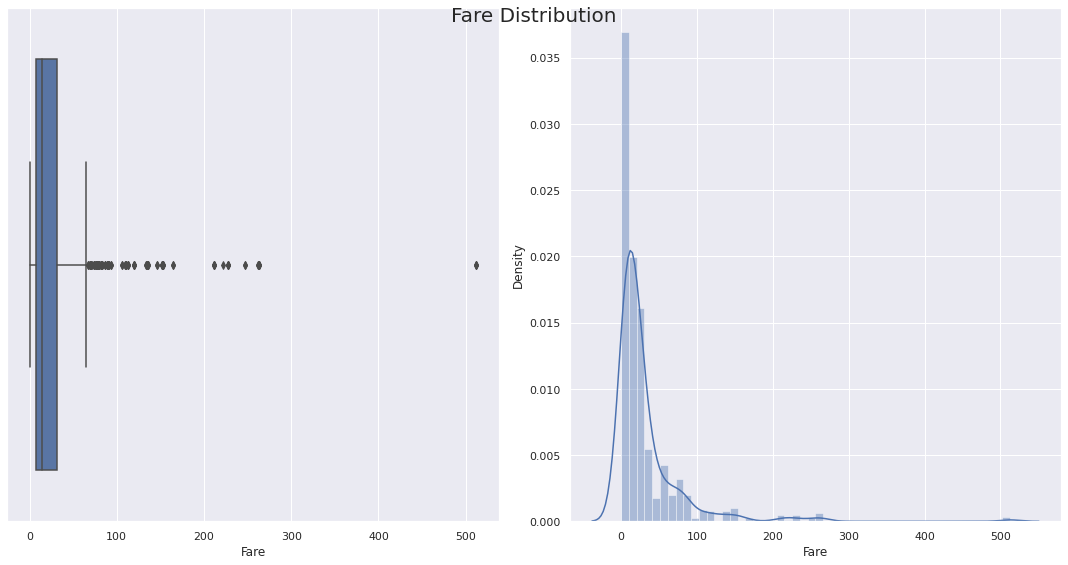

In [ ]:
f,axes=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x="Fare",data=train,ax=axes[0])
sns.distplot(train["Fare"],ax=axes[1])
plt.tight_layout()
plt.suptitle("Fare Distribution",fontsize=20)



In [ ]:
#identify outliers
def identify_outliers(variable, dataset,x,y):
    q1 = dataset[variable].quantile(x)
    q3 = dataset[variable].quantile(y)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return dataset[(dataset[variable] > upper_bound) | (dataset[variable] < lower_bound)]

for dataset in full_data:
    outs = identify_outliers("Fare", dataset,0.25,0.75)
    dataset.loc[outs.index,"Fare"] = np.nan
    
    #identify missing values in the Fare column and display the rows with missing values
print(train["Fare"].isnull().sum())
print(test["Fare"].isnull().sum())


116
55


In [ ]:
#identify the correlation between the Fare and pclass and FamilySize
print(train.corr()["Fare"])


PassengerId     0.002942
Survived        0.234422
Pclass         -0.589776
Sex            -0.134106
Age             0.090865
SibSp           0.370388
Parch           0.336844
Fare            1.000000
Embarked       -0.080608
FamilySize      0.422070
Family_Group    0.475447
Title           0.268542
Name: Fare, dtype: float64


In [ ]:
#fill the missing values in the Fare column with the median value of the Fare of each pclass and family_group
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].fillna(dataset.groupby(["Pclass","Family_Group"])["Fare"].transform("median"))

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group,Title


In [ ]:
train[train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.00,3,2,19950,NaN,C23 C25 C27,1,6,3,1
88,89,1,1,"Fortune, Miss. Mabel Helen",0,23.00,3,2,19950,NaN,C23 C25 C27,1,6,3,2
297,298,0,1,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,NaN,C22 C26,1,4,3,2
305,306,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,NaN,C22 C26,1,4,3,4
311,312,1,1,"Ryerson, Miss. Emily Borie",0,18.00,2,2,PC 17608,NaN,B57 B59 B63 B66,2,5,3,2
341,342,1,1,"Fortune, Miss. Alice Elizabeth",0,24.00,3,2,19950,NaN,C23 C25 C27,1,6,3,2
390,391,1,1,"Carter, Mr. William Ernest",1,36.00,1,2,113760,NaN,B96 B98,1,4,3,1
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.00,1,2,113760,NaN,B96 B98,1,4,3,2
438,439,0,1,"Fortune, Mr. Mark",1,64.00,1,4,19950,NaN,C23 C25 C27,1,6,3,1
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,NaN,C22 C26,1,4,3,3


In [ ]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].fillna(dataset.groupby(["Title","FamilySize"])["Fare"].transform("median"))

In [ ]:
train[train['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group,Title


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Fare Distribution')

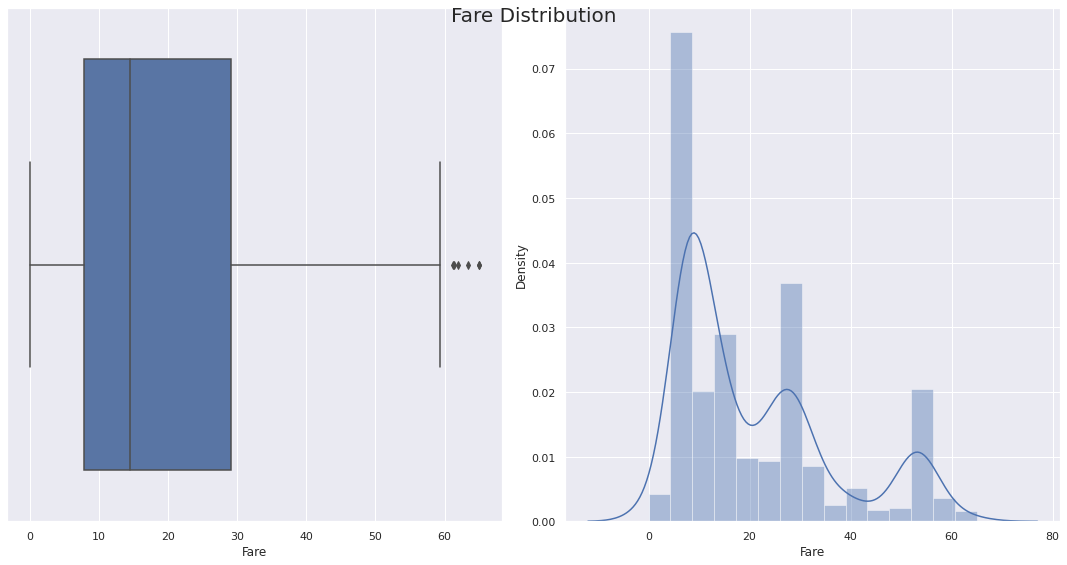

In [ ]:
f,axes=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x="Fare",data=train,ax=axes[0])
sns.distplot(train["Fare"],ax=axes[1])
plt.tight_layout()
plt.suptitle("Fare Distribution",fontsize=20)



In [ ]:
train.Fare.quantile([0.25,0.5,0.75]).round(3)

0.25     7.910
0.50    14.454
0.75    29.125
Name: Fare, dtype: float64

## Fare Group

In [ ]:
for dataset in full_data:
    dataset["Fare_Group"]=0
    dataset.loc[dataset["Fare"]<=7.91,"Fare_Group"]=1
    dataset.loc[(dataset["Fare"]>7.91) & (dataset["Fare"]<=14.45),"Fare_Group"]=2
    dataset.loc[(dataset["Fare"]>14.454) & (dataset["Fare"]<=29.125),"Fare_Group"]=3
    dataset.loc[dataset["Fare"]>29.125,"Fare_Group"]=4
    dataset["Fare_Group"]=dataset["Fare_Group"].astype(int)

    

In [ ]:
pd.crosstab(train.Survived,train.Fare_Group,margins=True).style.set_caption("Survived vs Fare_Group").background_gradient(cmap='coolwarm')


Fare_Group,1,2,3,4,All
Survived,,,,,
0,179,152,131,87,549
1,44,67,96,135,342
All,223,219,227,222,891


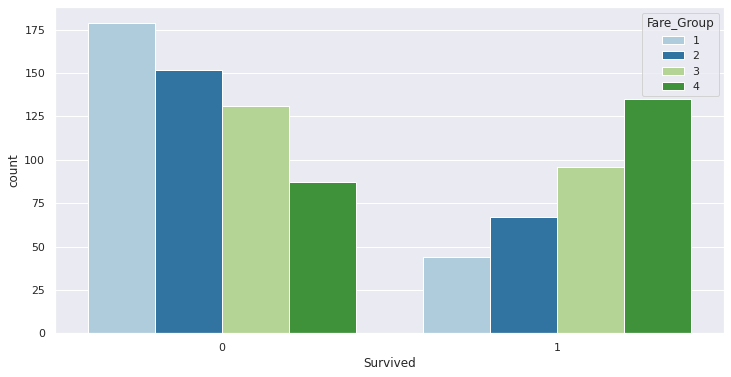

In [ ]:
sns.countplot(x="Survived",hue="Fare_Group",data=train,palette="Paired")
sns.set(rc={'figure.figsize':(15,8)})


In [ ]:
train.isnull().sum()["Age"]


177

In [ ]:
#identify the most important collumns to replace the missing values in the Age column
train.corr()["Age"].sort_values(ascending=False)


Age             1.000000
Fare            0.174293
Fare_Group      0.106673
Sex             0.093254
PassengerId     0.036847
Embarked        0.010171
Survived       -0.077221
Title          -0.106788
Parch          -0.189119
Family_Group   -0.272838
FamilySize     -0.301914
SibSp          -0.308247
Pclass         -0.369226
Name: Age, dtype: float64

## Filling the missing values in the Age Collumns
### Imputation of the missing values using the Pclass and FamilySize collumns

In [ ]:
#identify correlation between the age and title
train.corr()["Age"].sort_values(ascending=False)


Age             1.000000
Fare            0.174293
Fare_Group      0.106673
Sex             0.093254
PassengerId     0.036847
Embarked        0.010171
Survived       -0.077221
Title          -0.106788
Parch          -0.189119
Family_Group   -0.272838
FamilySize     -0.301914
SibSp          -0.308247
Pclass         -0.369226
Name: Age, dtype: float64

In [ ]:
#fillna with groupby median pclass and familysize
for dataset in full_data:
    dataset["Age"] = dataset["Age"].fillna(dataset.groupby(["Pclass","FamilySize"])["Age"].transform("median"))

In [ ]:
print(train["Age"].isnull().sum())
print(test["Age"].isnull().sum())

7
5


In [ ]:
#show the null values in the Age column
train[train["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family_Group,Title,Fare_Group
159,160,0,3,"Sage, Master. Thomas Henry",1,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,4,3
180,181,0,3,"Sage, Miss. Constance Gladys",0,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,2,3
201,202,0,3,"Sage, Mr. Frederick",1,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,1,3
324,325,0,3,"Sage, Mr. George John Jr",1,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,1,3
792,793,0,3,"Sage, Miss. Stella Anna",0,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,2,3
846,847,0,3,"Sage, Mr. Douglas Bullen",1,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,1,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,29.125,NaN,1,11,3,2,3


In [ ]:
#fillna with groupby median pclass and familysize
for dataset in full_data:
    dataset["Age"] = dataset["Age"].fillna(dataset.groupby(["Title","Sex"])["Age"].transform("median"))

In [ ]:
print(train["Age"].isnull().sum())
print(test["Age"].isnull().sum())

0
0


### PassengerId,Name and Ticket columns will be dropped as they seem to be not quite meaningfull for the survival prediction nor they are highly correlated with the Survived collumns
###  Cabin will be dropped due to the high rate of missing data
###  Sibsp and Parch  will also  be dropped as well as the FamilySize collumn contains much of the information of the Sibsp and Parch collumns

In [ ]:
def drop_columns(df,columns):
    for column in columns:
        df.drop(column,axis=1,inplace=True)


pid=test["PassengerId"]
columns_to_drop=["PassengerId","Name","Ticket","Cabin","SibSp","Parch"]

for dataset in full_data:
    drop_columns(dataset,columns_to_drop)
    
    
    
    train.head()  


### Applying log transformation to the Fare variable increases the accuracy of the classifiers as the values of Fare are still slightly positively skewed.However it does not make any difference on Random Forest Classifier which is more robust when dealing with outliers.

In [ ]:

print(train.Fare.skew())

for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda x: np.log(x) if x > 0 else 0)
    
print(train.Fare.skew())

1.036526692889769
-0.36768928695629627


# **Machine Learning** 

## We import the appropriate machine learning libraries that are needed for the prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Split the data into train and test

In [ ]:
X_train = train.drop(["Survived"], axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


X_train (712, 9)
X_test (179, 9)
y_train (712,)
y_test (179,)


## Prediction accuracy for a dictionary of classifiers

                Algorithm  Accuracy
5  RandomForestClassifier  0.860335
4    KNeighborsClassifier  0.810056
3      LogisticRegression  0.798883
2  DecisionTreeClassifier  0.793296
0              GaussianNB  0.776536
1                     SVC  0.709497


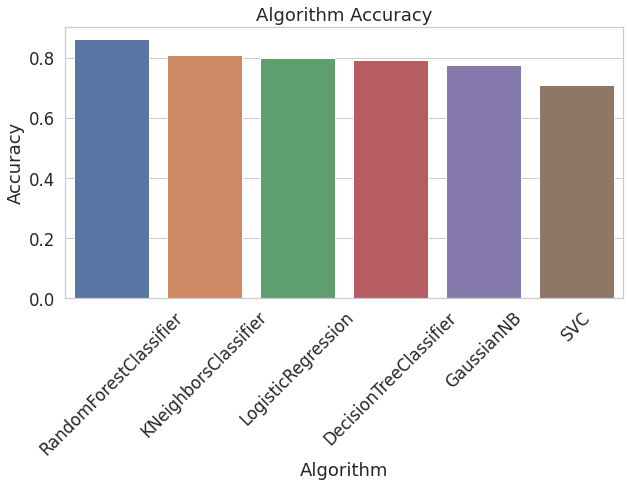

In [ ]:

classifiers = {GaussianNB(): 'Naive Bayes',SVC(probability=True): 'SVM', DecisionTreeClassifier(): 'Decision Tree',  LogisticRegression(max_iter=1000): 'Logistic Regression',
               KNeighborsClassifier(n_neighbors=3): 'KNN',RandomForestClassifier( n_estimators=700, min_samples_split=10,random_state=1): 'Random Forest'}
               
                                                       
def accuracy(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score= accuracy_score(y_test, y_pred)
    return classifier.__class__.__name__,acc_score

def plot_accuracy(classifiers):
    algorithms = pd.DataFrame({'Algorithm': [],
                     'Accuracy': []})
    for classifier in classifiers:
        name,acc = accuracy(classifier)
        algorithms = algorithms.append({'Algorithm': name,
                                        'Accuracy': acc}, ignore_index=True)
    algorithms = algorithms.sort_values(by='Accuracy', ascending=False)
    print(algorithms)
    sns.set_style('whitegrid')
    sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Algorithm', y='Accuracy', data=algorithms)
    plt.xticks(rotation=45)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.title('Algorithm Accuracy')
    plt.show()


plot_accuracy(classifiers)


# Evaluation Metrics

In [ ]:
def evaluate(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('Classification Report for {}'.format(classifier.__class__.__name__))
    print(classification_report(y_test, y_pred))    
    print('Confusion Matrix for {}:'.format(classifier.__class__.__name__), confusion_matrix(y_test, y_pred))
    print('Mean squared error of {} is {}'.format(classifier.__class__.__name__, mean_squared_error(y_test, y_pred)))
    print('Mean absolute error of {} is {}'.format(classifier.__class__.__name__, mean_absolute_error(y_test, y_pred)))
    print('----------------------------------------------------------------------------------------------------------------------')



for classifier, name in classifiers.items():
    evaluate(classifier)

Classification Report for GaussianNB
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       105
           1       0.69      0.84      0.76        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.77       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix for GaussianNB: [[77 28]
 [12 62]]
Mean squared error of GaussianNB is 0.22346368715083798
Mean absolute error of GaussianNB is 0.22346368715083798
----------------------------------------------------------------------------------------------------------------------
Classification Report for SVC
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       105
           1       0.81      0.39      0.53        74

    accuracy                           0.71       179
   macro avg       0.75      0.66      0.66       179
weighted avg       0.74      0.71      0.68       

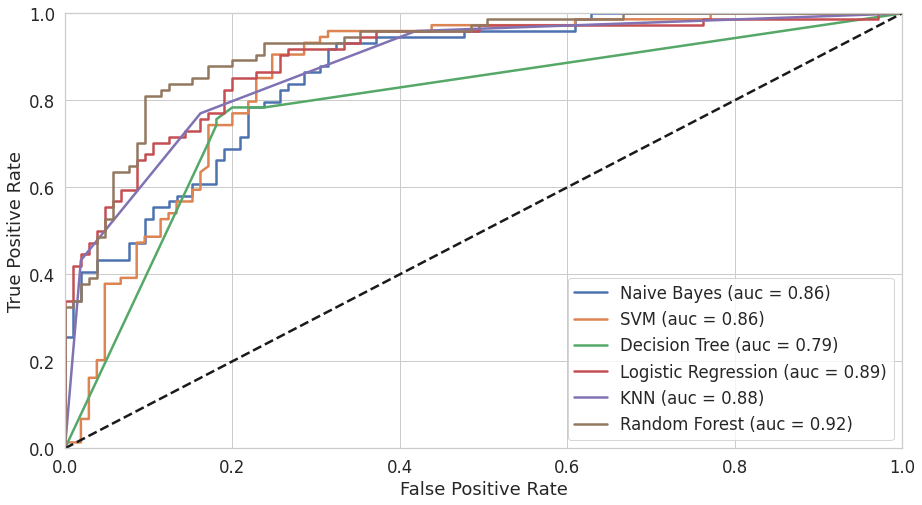

In [ ]:

for clf, label in classifiers.items():
  
        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (auc = %0.2f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
            

# Random Forest Classifier prediction for random passengers

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=700,
                                min_samples_split=10,
                                random_state=1)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(test)

random_passengers = np.random.choice(test.shape[0], 3, replace=False)
for i in random_passengers:
    print(test.iloc[i])
    if y_pred[i] == 1:
        print('Survived')
        print('----------------------------------------------------------------------------------------------------------------------')
    else:
        print('Not Survived')
        print('----------------------------------------------------------------------------------------------------------------------')
        
        
#submission file
submission = pd.DataFrame({
        "PassengerId":pid,
        "Survived": y_pred
    })
    #export it to csv
submission.to_csv('submission.csv', index=False)

Pclass           3.000000
Sex              0.000000
Age             23.500000
Fare             3.146305
Embarked         3.000000
FamilySize       1.000000
Family_Group     1.000000
Title            2.000000
Fare_Group       3.000000
Name: 127, dtype: float64
Survived
----------------------------------------------------------------------------------------------------------------------
Pclass           1.00000
Sex              0.00000
Age             64.00000
Fare             3.45566
Embarked         2.00000
FamilySize       1.00000
Family_Group     1.00000
Title            3.00000
Fare_Group       4.00000
Name: 179, dtype: float64
Survived
----------------------------------------------------------------------------------------------------------------------
Pclass          3.000000
Sex             0.000000
Age             1.000000
Fare            2.500066
Embarked        1.000000
FamilySize      1.000000
Family_Group    1.000000
Title           2.000000
Fare_Group      2.000000
Name: 26